In [ ]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/python_for_data_scientists/customer_segmentation.csv')

# Data Exploration

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.groupby("Response").count()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
Response,,,,,,,,,,,,,,,,,,,,,
0,1906,1906,1906,1906,1883,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906
1,334,334,334,334,333,334,334,334,334,334,...,334,334,334,334,334,334,334,334,334,334


In [ ]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
# Dropping field with high cardinality level
df.drop('Dt_Customer', axis=1, inplace=True)

In [ ]:
df.describe(include=['O'])

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


<ipython-input-12-085b9104f676>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Education',


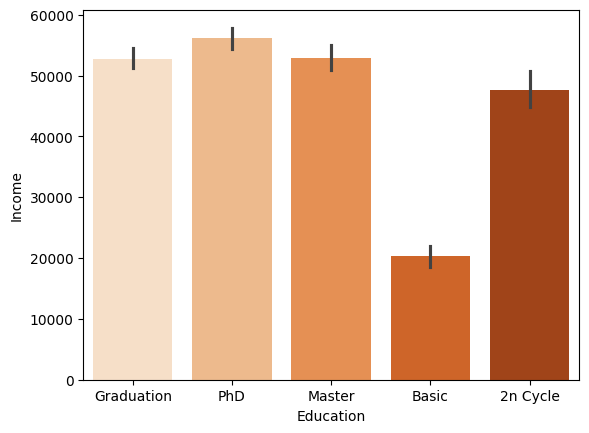

In [ ]:
sns.barplot(x = 'Education',
            y = 'Income',
            data = df,
            palette = "Oranges")

# Show the plot
plt.show()

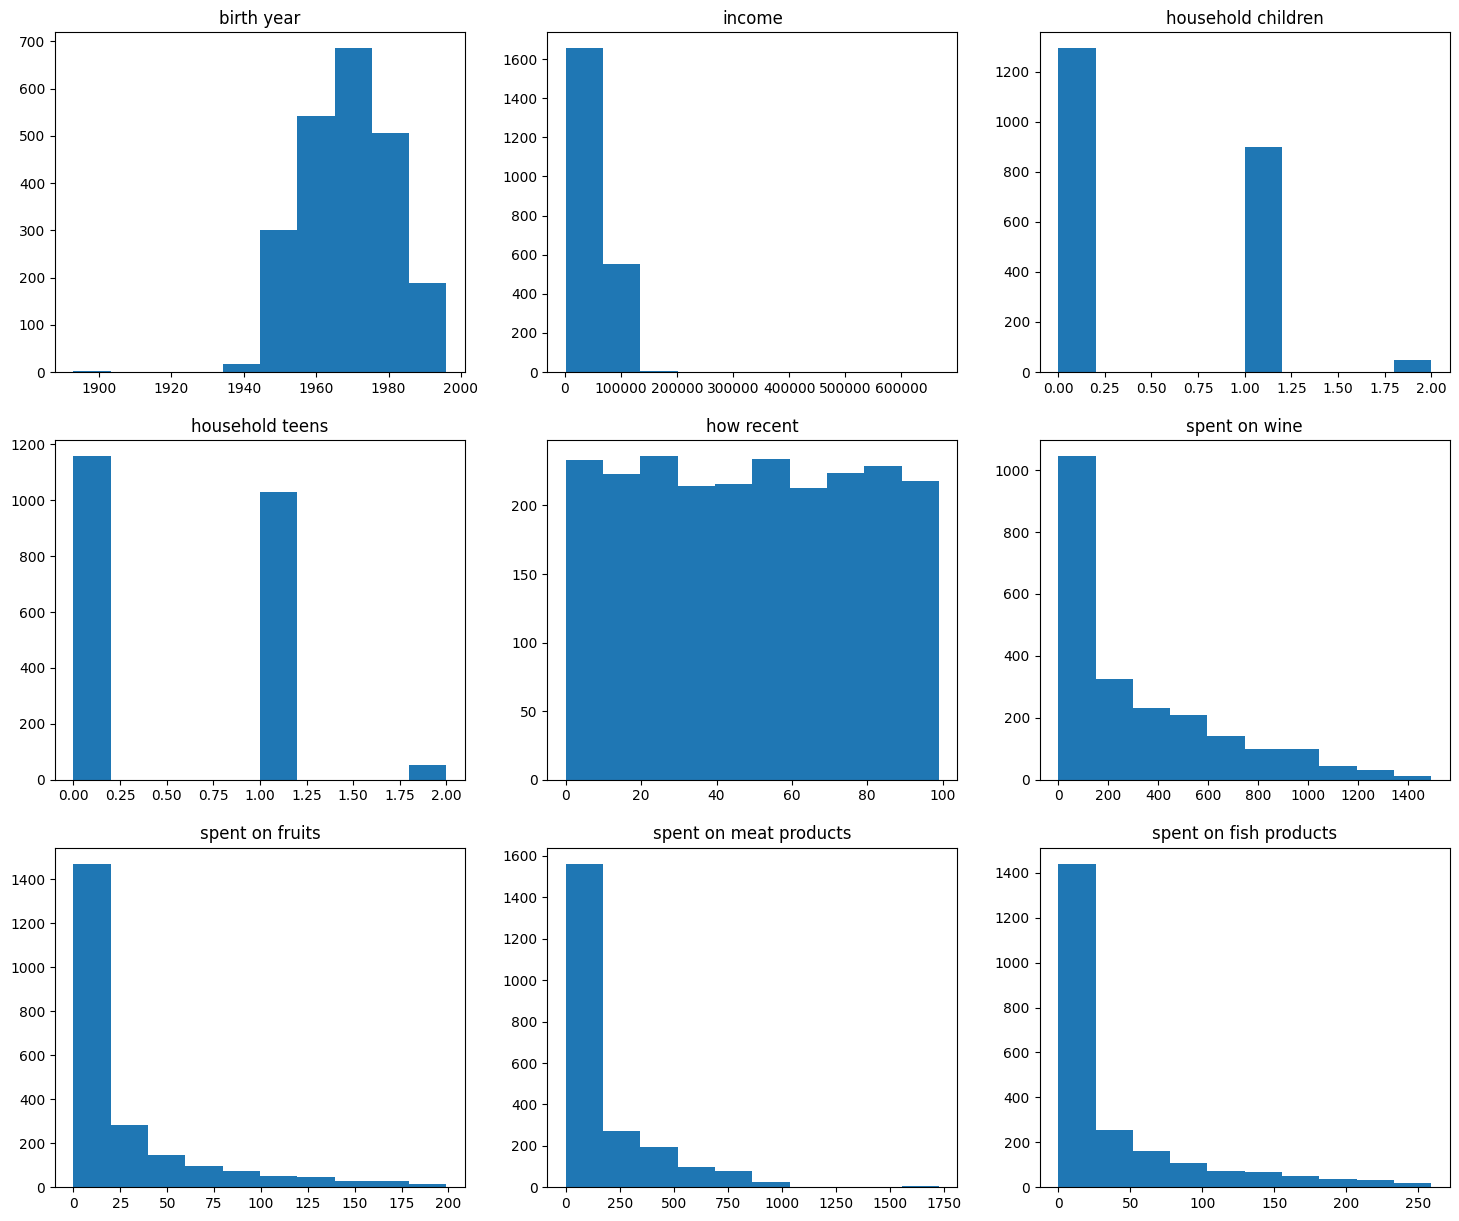

In [ ]:
plt.figure(figsize=(18,15))

plt.subplot(3, 3, 1)
plt.hist(df["Year_Birth"])
plt.title("birth year")

plt.subplot(3, 3, 2)
plt.hist(df["Income"])
plt.title("income")

plt.subplot(3, 3, 3)
plt.hist(df["Kidhome"])
plt.title("household children")

plt.subplot(3, 3, 4)
plt.hist(df["Teenhome"])
plt.title("household teens")

plt.subplot(3, 3, 5)
plt.hist(df["Recency"])
plt.title("how recent")

plt.subplot(3, 3, 6)
plt.hist(df["MntWines"])
plt.title("spent on wine")

plt.subplot(3, 3, 7)
plt.hist(df["MntFruits"])
plt.title("spent on fruits")

plt.subplot(3, 3, 8)
plt.hist(df["MntMeatProducts"])
plt.title("spent on meat products")

plt.subplot(3, 3, 9)
plt.hist(df["MntFishProducts"])
plt.title("spent on fish products")


plt.show()

In [ ]:
from scipy import stats

In [ ]:
#Year_Birth
print('Year Birth')
print(stats.shapiro(df.Year_Birth))
print('')

#Income
print('Income')
print(stats.shapiro(df.Income))
print('')

#Kid Home
print('Kid Home')
print(stats.shapiro(df.Kidhome))
print('')

#Teen Home
print('Teen Home')
print(stats.shapiro(df.Teenhome))
print('')

#Recency
print('Recency')
print(stats.shapiro(df.Recency))
print('')

#MntWines
print('Wine')
print(stats.shapiro(df.MntWines))
print('')

#MntFruits
print('Fruits')
print(stats.shapiro(df.MntFruits))
print('')

#MntMeatProducts
print('Meat')
print(stats.shapiro(df.MntMeatProducts))
print('')

#MntMeatProducts
print('Fish')
print(stats.shapiro(df.MntFishProducts))

Year Birth
ShapiroResult(statistic=0.9757195115089417, pvalue=4.535353233457941e-19)

Income
ShapiroResult(statistic=nan, pvalue=1.0)

Kid Home
ShapiroResult(statistic=0.6765908002853394, pvalue=0.0)

Teen Home
ShapiroResult(statistic=0.6938788294792175, pvalue=0.0)

Recency
ShapiroResult(statistic=0.9540770053863525, pvalue=5.698252316095217e-26)

Wine
ShapiroResult(statistic=0.8381436467170715, pvalue=5.7032847498020055e-43)

Fruits
ShapiroResult(statistic=0.6890809535980225, pvalue=0.0)

Meat
ShapiroResult(statistic=0.7298182249069214, pvalue=0.0)

Fish
ShapiroResult(statistic=0.7085921168327332, pvalue=0.0)


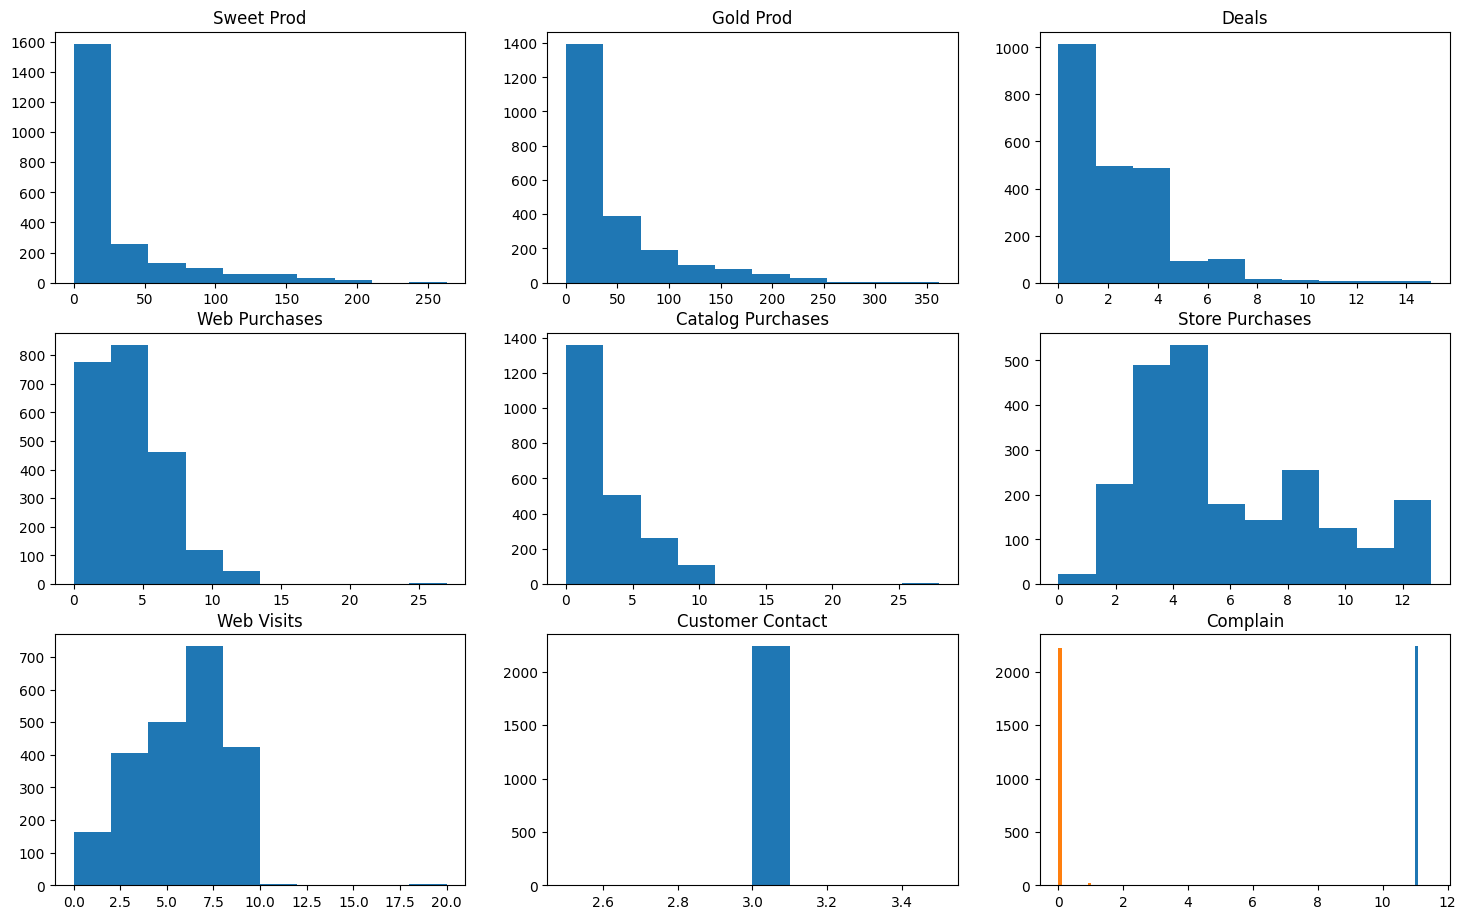

In [ ]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(4, 3, 1)
plt.hist(df['MntSweetProducts'])
plt.title("Sweet Prod")

plt.subplot(4, 3, 2)
plt.hist(df["MntGoldProds"])
plt.title("Gold Prod")

plt.subplot(4, 3, 3)
plt.hist(df["NumDealsPurchases"])
plt.title("Deals")

plt.subplot(4, 3, 4)
plt.hist(df["NumWebPurchases"])
plt.title("Web Purchases")

plt.subplot(4, 3, 5)
plt.hist(df["NumCatalogPurchases"])
plt.title("Catalog Purchases")

plt.subplot(4, 3, 6)
plt.hist(df["NumStorePurchases"])
plt.title("Store Purchases")

plt.subplot(4, 3, 7)
plt.hist(df["NumWebVisitsMonth"])
plt.title("Web Visits")


plt.subplot(4, 3, 8)
plt.hist(df["Z_CostContact"])
plt.title("Customer Contact")

plt.subplot(4, 3, 9)
plt.hist(df["Z_Revenue"])
plt.title("Revenue")

plt.subplot(4, 3, 9)
plt.hist(df["Complain"])
plt.title("Complain")

plt.show()

In [ ]:
df.drop(['Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)

In [ ]:
#Sweet Prod
print('Sweet Prod')
print(stats.shapiro(df.MntSweetProducts))
print('')

#Gold Prod
print('Gold Prod')
print(stats.shapiro(df.MntGoldProds))
print('')

#Deals
print('Deals')
print(stats.shapiro(df.NumDealsPurchases))
print('')

#Web Purchases
print('Web Prurchases')
print(stats.shapiro(df.NumWebPurchases))
print('')

#Catalog
print('Catalog Purchases')
print(stats.shapiro(df.NumCatalogPurchases))
print('')

#store
print('Store Purchases')
print(stats.shapiro(df.NumStorePurchases))
print('')

#Web
print('Web Visits')
print(stats.shapiro(df.NumWebVisitsMonth))
print('')

#Complain
print('Complain')
print(stats.shapiro(df.Complain))
print('')

Sweet Prod
ShapiroResult(statistic=0.686748743057251, pvalue=0.0)

Gold Prod
ShapiroResult(statistic=0.7670890688896179, pvalue=0.0)

Deals
ShapiroResult(statistic=0.7398087978363037, pvalue=0.0)

Web Prurchases
ShapiroResult(statistic=0.8978638052940369, pvalue=3.07018045318554e-36)

Catalog Purchases
ShapiroResult(statistic=0.8149206638336182, pvalue=4.203895392974451e-45)

Store Purchases
ShapiroResult(statistic=0.9044589996337891, pvalue=2.591058742010435e-35)

Web Visits
ShapiroResult(statistic=0.9298980236053467, pvalue=3.5143218581109955e-31)

Complain
ShapiroResult(statistic=0.06835216283798218, pvalue=0.0)



In [ ]:
df.Marital_Status.nunique()

8

In [ ]:
df.Education.nunique()

5

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Education'])], axis=1)

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Marital_Status'])], axis=1)

In [ ]:
df.drop('Education', axis=1, inplace=True)

In [ ]:
df.drop('Marital_Status', axis=1, inplace=True)

In [ ]:
df[df['Income'].isnull()]

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
10,1994,1983,NaN,1,0,11,5,5,6,0,...,0,0,0,0,0,1,0,0,0,0
27,5255,1986,NaN,1,0,19,5,1,3,3,...,0,0,0,0,0,0,1,0,0,0
43,7281,1959,NaN,0,0,80,81,11,50,3,...,0,1,0,0,0,0,1,0,0,0
48,7244,1951,NaN,2,1,96,48,5,48,6,...,0,0,0,0,0,0,1,0,0,0
58,8557,1982,NaN,1,0,57,11,3,22,2,...,0,0,0,0,0,0,1,0,0,0
71,10629,1973,NaN,1,0,25,25,3,43,17,...,0,0,0,0,0,1,0,0,0,0
90,8996,1957,NaN,2,1,4,230,42,192,49,...,0,1,0,0,0,1,0,0,0,0
91,9235,1957,NaN,1,1,45,7,0,8,2,...,0,0,0,0,0,0,1,0,0,0
92,5798,1973,NaN,0,0,87,445,37,359,98,...,1,0,0,0,0,0,0,1,0,0
128,8268,1961,NaN,0,1,23,352,0,27,10,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
df['Income'].fillna((df['Income'].mean()), inplace=True)

In [ ]:
df.shape

(2240, 37)

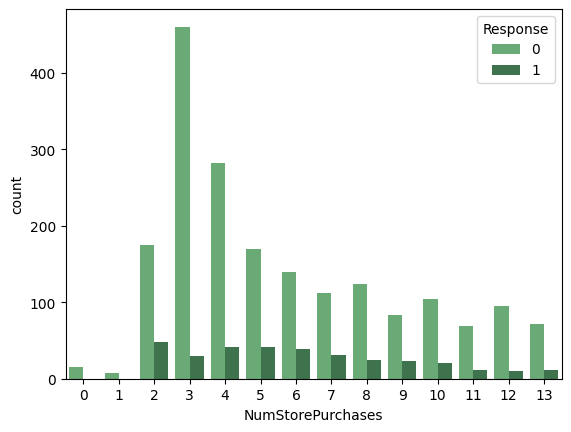

In [ ]:
sns.countplot(x="NumStorePurchases", hue="Response", data=df, palette="Greens_d")
plt.show()

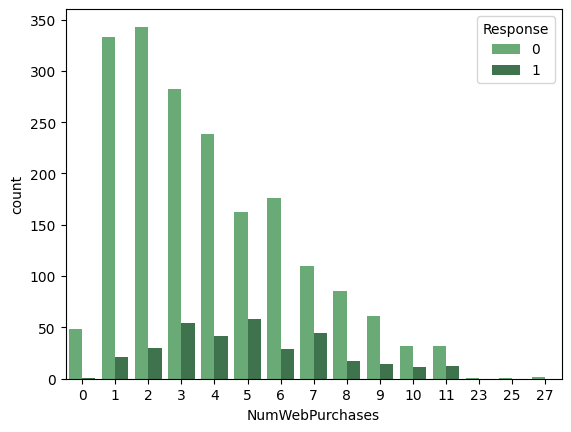

In [ ]:
sns.countplot(x="NumWebPurchases", hue="Response", data=df, palette="Greens_d")
plt.show()

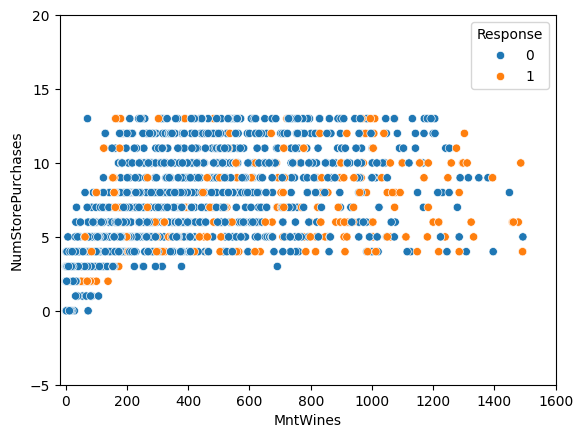

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(x = 'MntWines', y = 'NumStorePurchases', data = df, hue=df['Response'])
ax.set_xlim(-20, 1600)
ax.set_ylim(-5, 20)
plt.show()

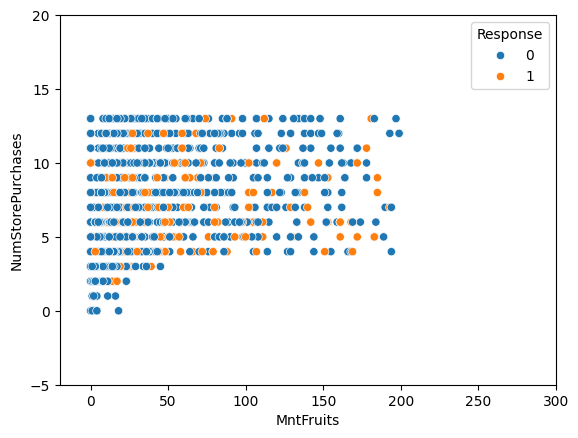

In [ ]:
ax = sns.scatterplot(x = 'MntFruits', y = 'NumStorePurchases', data = df, hue=df['Response'])
ax.set_xlim(-20, 300)
ax.set_ylim(-5, 20)
plt.show()

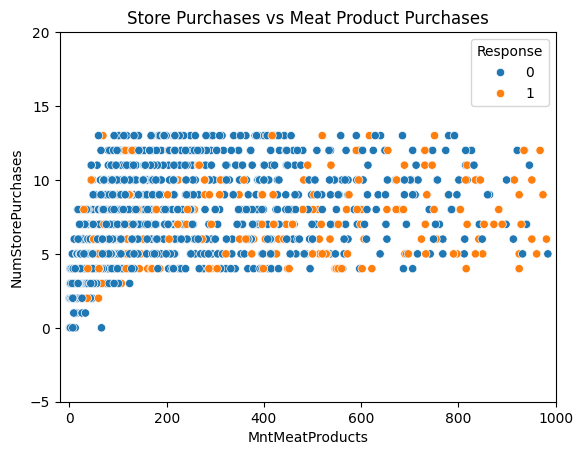

In [ ]:
ax = sns.scatterplot(x = 'MntMeatProducts', y = 'NumStorePurchases', data = df, hue=df['Response'])
ax.set_xlim(-20, 1000)
ax.set_ylim(-5, 20)
ax.set_title('Store Purchases vs Meat Product Purchases')
plt.show()

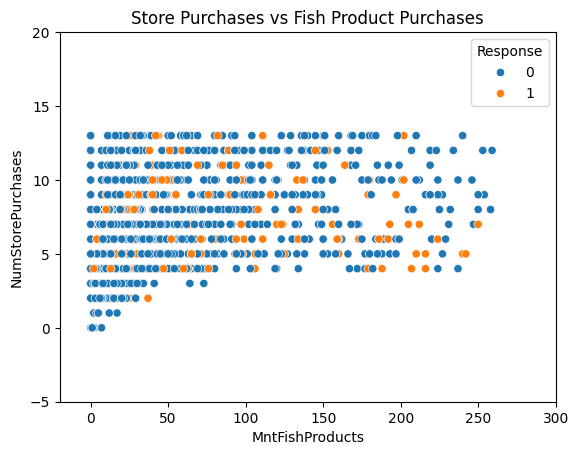

In [ ]:
ax = sns.scatterplot(x = 'MntFishProducts', y = 'NumStorePurchases', data = df, hue=df['Response'])
ax.set_xlim(-20, 300)
ax.set_ylim(-5, 20)
ax.set_title('Store Purchases vs Fish Product Purchases')
plt.show()

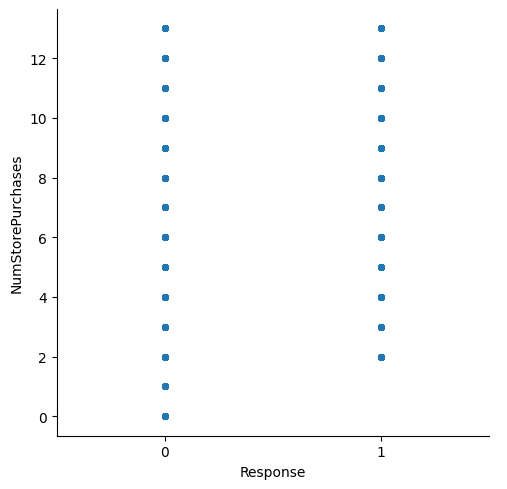

In [ ]:
sns.catplot(data=df, x="Response", y="NumStorePurchases", jitter=False)

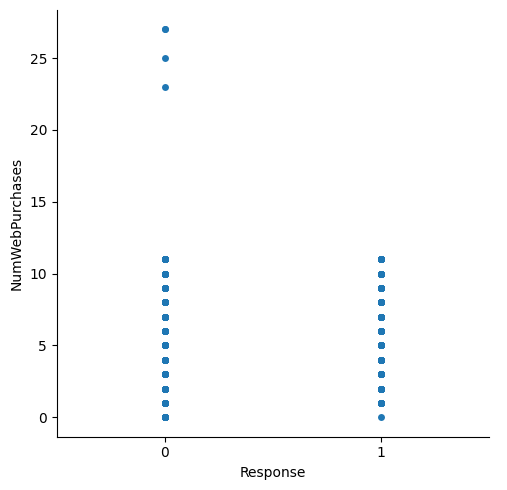

In [ ]:
sns.catplot(data=df, x="Response", y="NumWebPurchases", jitter=False)

In [ ]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
ID,1.000000,0.000028,0.013036,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.025833,0.004368,0.004230,-0.032310,-0.017289,0.010007,-0.016558,0.009563,0.021937,0.002029
Year_Birth,0.000028,1.000000,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,-0.071557,-0.121370,0.015455,0.012819,-0.071774,0.051193,0.116978,-0.052258,-0.161370,0.010465
Income,0.013036,-0.160942,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,...,0.011750,0.081126,0.024026,-0.012374,0.007970,-0.016399,-0.025628,0.023288,0.031501,-0.004556
Kidhome,0.002406,0.230176,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.008146,-0.042013,-0.024669,0.037813,-0.019199,0.017403,0.019779,0.006373,-0.073760,-0.024669
Teenhome,-0.002580,-0.352111,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.023601,0.089451,-0.027798,0.010791,0.052613,0.007749,-0.095925,0.025038,0.045093,0.027112
Recency,-0.046524,-0.019871,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.023394,-0.011377,0.004017,-0.023746,0.004434,-0.022757,0.007158,0.020363,0.000218,-0.047603
MntWines,-0.022878,-0.157773,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,0.038517,0.157295,0.004581,-0.012979,0.021120,-0.010491,-0.024216,0.005077,0.036632,0.001605
MntFruits,0.004600,-0.017917,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.051996,-0.082772,0.043752,-0.020539,0.009612,-0.011304,0.007002,-0.014155,0.032211,-0.017518
MntMeatProducts,-0.004437,-0.030872,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.007040,0.003855,0.019281,-0.022819,-0.025219,-0.022011,0.035079,0.003021,0.018675,-0.015492
MntFishProducts,-0.024475,-0.041625,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.044186,-0.104060,0.091940,-0.020020,-0.015449,-0.031116,0.006609,0.015865,0.047894,-0.018350


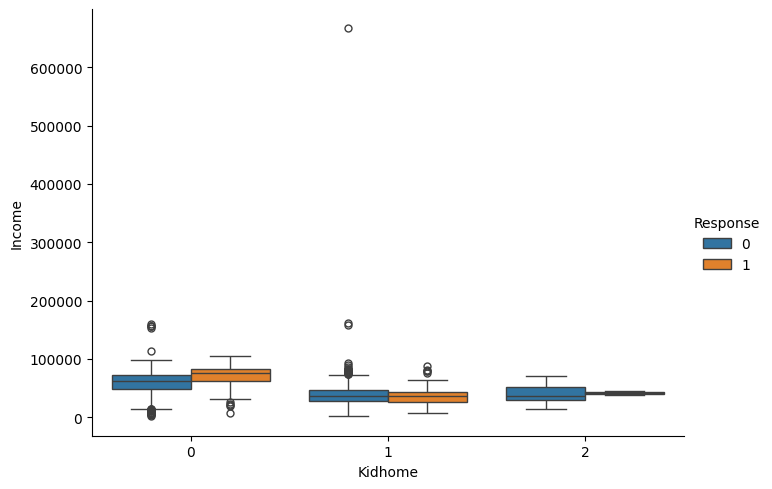

In [ ]:
sns.catplot(data=df, x="Kidhome", y="Income", hue="Response", kind="box", aspect=11.7/8.27)

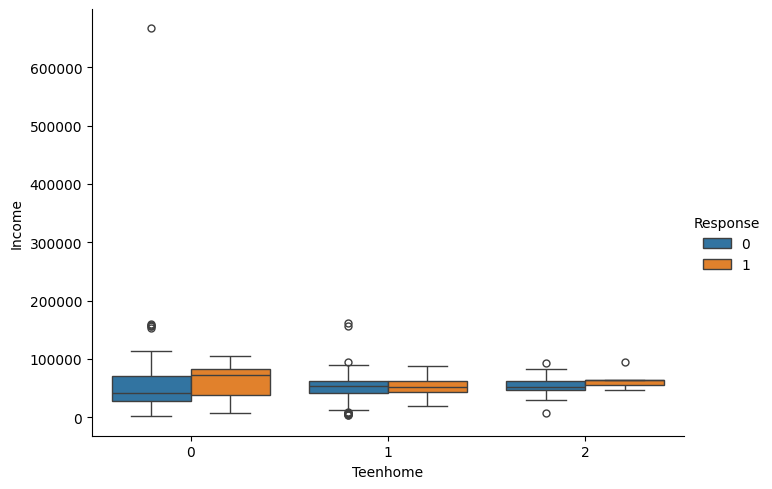

In [ ]:
sns.catplot(data=df, x="Teenhome", y="Income", hue="Response", kind="box", aspect=11.7/8.27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [ ]:
df.shape

(2240, 37)

# Classification

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Response', axis=1)

In [ ]:
y = df['Response']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
lr = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='none', random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Score on training data:  0.8702380952380953
Score on test data:  0.8339285714285715


In [ ]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='l2', C=0.6, random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8696428571428572
Score on test data:  0.8339285714285715


In [ ]:
y_pred_test = lr.predict(X_test)

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.8160714285714286

In [ ]:
print(classification_report(y_test, y_pred_test, zero_division=True))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       457
           1       0.64      0.22      0.33       103

    accuracy                           0.83       560
   macro avg       0.74      0.60      0.62       560
weighted avg       0.81      0.83      0.80       560



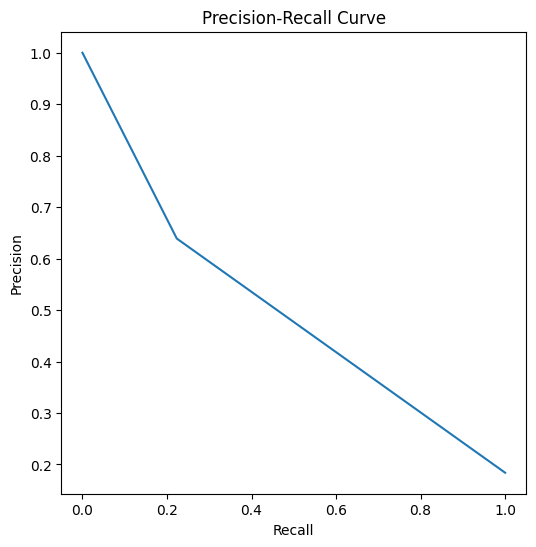

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

predictions = lr.predict(X_test)

pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

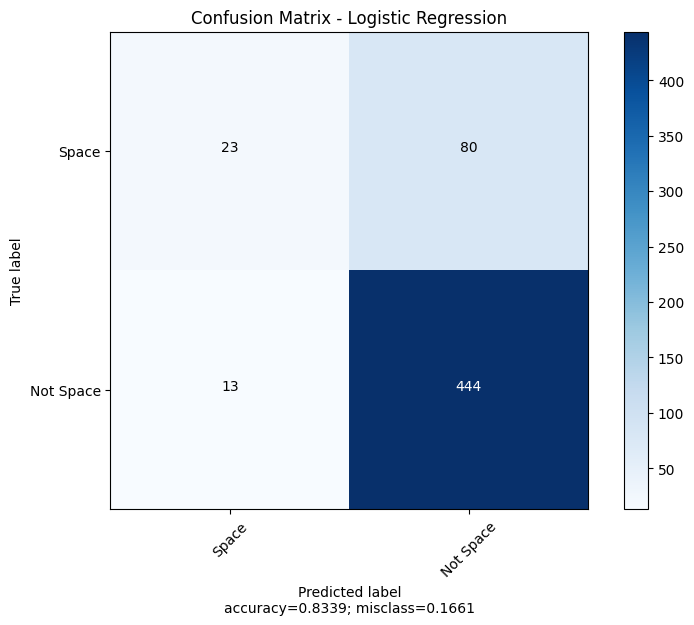

In [ ]:
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
plot_confusion_matrix(cm=confusion, target_names = ['Space', 'Not Space'], title = 'Confusion Matrix - Logistic Regression',normalize=False)


Attempt to optimize

In [ ]:
lr = LogisticRegression(solver='saga', max_iter=10000, penalty='l1', random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8625
Score on test data:  0.8160714285714286


In [ ]:
lr = LogisticRegression(solver='sag', max_iter=10000, penalty='l2', random_state=2)
lr.fit(X_train, y_train)

test_score = lr.score(X_test, y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8625
Score on test data:  0.8160714285714286


In [ ]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.8160714285714286

# Logistic Regression Results: This model has a good score and compared to the predictor score I believe this model is a great fit using the lbfgs solver

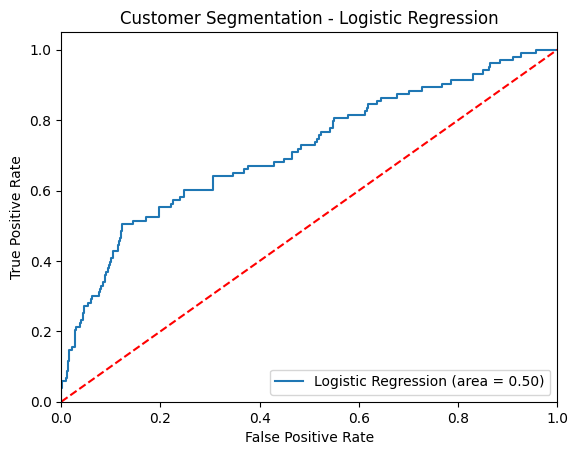

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Customer Segmentation - Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred_test = forest.predict(X_test)

train_score = forest.score(X_train, y_train)
test_score = forest.score(X_test, y_test)
#test_score = accuracy_score(y_test, y_pred_test)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  1.0
Score on test data:  0.8625


In [ ]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       457
           1       0.81      0.33      0.47       103

    accuracy                           0.86       560
   macro avg       0.84      0.66      0.69       560
weighted avg       0.86      0.86      0.84       560



The model scored a perfect 1 and the predictor score a 0.86, which makes me believe there is overfitting in this model

In [ ]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score


rfc = ensemble.RandomForestClassifier()


cross_val_score(rfc, X, y, cv=5)

array([0.87276786, 0.89508929, 0.86607143, 0.87276786, 0.88392857])

In [ ]:
forest = RandomForestClassifier(oob_score = True,n_jobs = 1)
forest.fit(X_train, y_train)

y_pred_test = forest.predict(X_test)

train_score = forest.score(X_train, y_train)
test_score = forest.score(X_test, y_test)
#test_score = accuracy_score(y_test, y_pred_test)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  1.0
Score on test data:  0.8589285714285714


<Axes: >

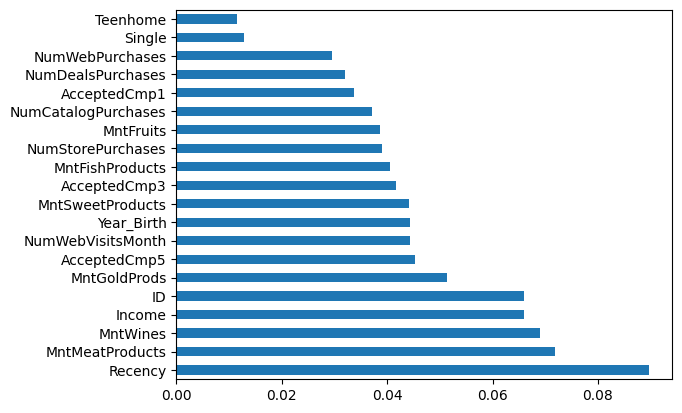

In [ ]:
rfc.fit(X, y)

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

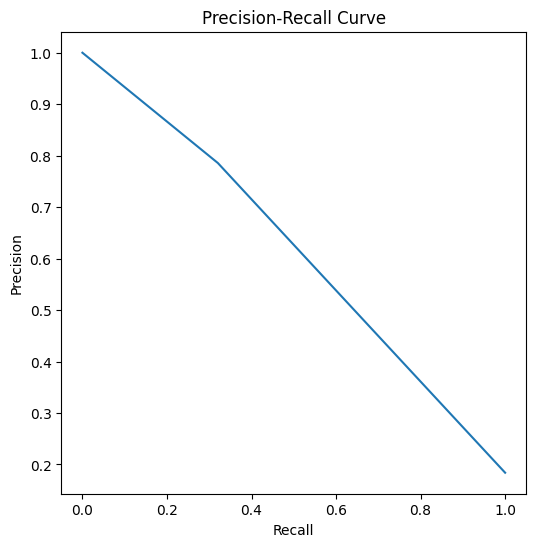

In [ ]:
predictions = forest.predict(X_test)

pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

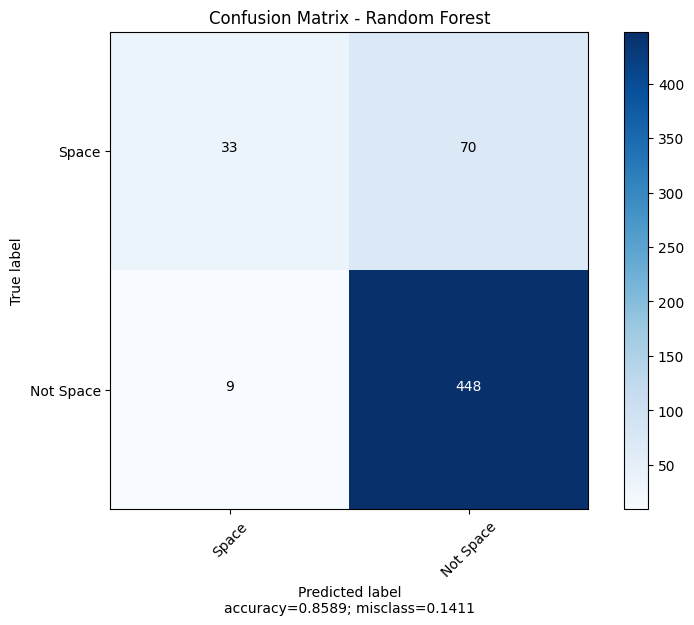

In [ ]:
confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
plot_confusion_matrix(cm=confusion, target_names = ['Space', 'Not Space'], title = 'Confusion Matrix - Random Forest',normalize=False)


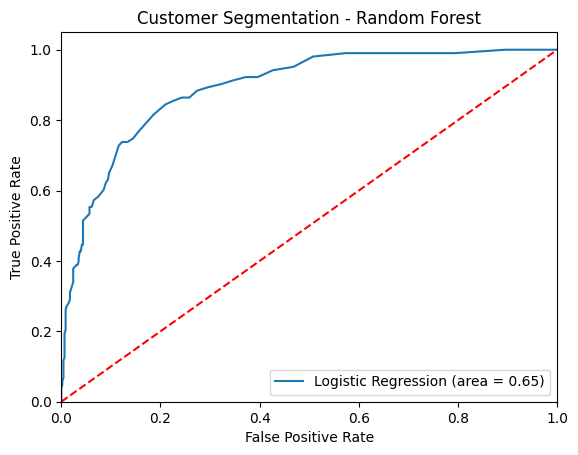

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, forest.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, forest.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Customer Segmentation - Random Forest')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Final Results: Between the Logistic Regression and the Random Forest, I believe that the Losgistic Regression model performed better and I would use that model over the Rendom Forest for this dataset.

# Revised Results: After looking at the receiver operating characteristic (ROC) curve, it would appear that the random forest is less due to chance and more accurate as this model minimizes the false positive and maximizes the true positive rate.